In [32]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import statsmodels.api as sm
import statsmodels.stats.outliers_influence
import pylab as pl
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import *
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_auc_score

### Reading File and process LGD Case indicator, grouping REO_Close and Charge off

In [2]:
os.chdir("C:\Users\ub55123\Desktop\Kaggle\MTG")

df = pd.read_csv('MTG_LGD_20150817.csv')

y = np.arange(len(df.index))

for i in y:
    if df.iloc[i].lgd_case in ['REO_Close','CO']:
        y[i] = 1
    else: y[i] = 0

df['lc'] = y  # This is target variable 

### Cut MOB into 10 equal buckets

In [4]:
df['MOBSeg'] = pd.cut(df.MOB,10,labels=np.arange(10))

### Cut LTV into 10 equal bucktes. Cap LTV at 200%

In [5]:
df['LTV'] = df.mtm_hpi_ltv_imp * (df.mtm_hpi_ltv_imp < 2) + 2 * (df.mtm_hpi_ltv_imp >= 2)
df['LTVSeg'] = pd.cut(df.LTV,10,labels=np.arange(10))

### Caculate Odds Ratio by MOB and LTV buckets

In [9]:
MOBodds = np.arange(10,dtype=np.float)
MOBct = np.arange(10)

MOBodds[0] = sp.log(float(df.query('(MOBSeg==0) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==0) & (lc==0)').shape[0]))
MOBodds[1] = sp.log(float(df.query('(MOBSeg==1) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==1) & (lc==0)').shape[0]))
MOBodds[2] = sp.log(float(df.query('(MOBSeg==2) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==2) & (lc==0)').shape[0]))
MOBodds[3] = sp.log(float(df.query('(MOBSeg==3) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==3) & (lc==0)').shape[0]))
MOBodds[4] = sp.log(float(df.query('(MOBSeg==4) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==4) & (lc==0)').shape[0]))
MOBodds[5] = sp.log(float(df.query('(MOBSeg==5) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==5) & (lc==0)').shape[0]))
MOBodds[6] = sp.log(float(df.query('(MOBSeg==6) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==6) & (lc==0)').shape[0]))
MOBodds[7] = sp.log(float(df.query('(MOBSeg==7) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==7) & (lc==0)').shape[0]))
MOBodds[8] = sp.log(float(df.query('(MOBSeg==8) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==8) & (lc==0)').shape[0]))
MOBodds[9] = sp.log(float(df.query('(MOBSeg==9) & (lc==1)').shape[0]) / float(df.query('(MOBSeg==9) & (lc==0)').shape[0]))

for i in np.arange(10):
    MOBct[i] = df.query('MOBSeg==' + str(i)).shape[0]
    
    
LTVodds = np.arange(10,dtype=np.float)
LTVct = np.arange(10)

LTVodds[0] = sp.log(float(df.query('(LTVSeg==0) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==0) & (lc==0)').shape[0]))
LTVodds[1] = sp.log(float(df.query('(LTVSeg==1) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==1) & (lc==0)').shape[0]))
LTVodds[2] = sp.log(float(df.query('(LTVSeg==2) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==2) & (lc==0)').shape[0]))
LTVodds[3] = sp.log(float(df.query('(LTVSeg==3) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==3) & (lc==0)').shape[0]))
LTVodds[4] = sp.log(float(df.query('(LTVSeg==4) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==4) & (lc==0)').shape[0]))
LTVodds[5] = sp.log(float(df.query('(LTVSeg==5) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==5) & (lc==0)').shape[0]))
LTVodds[6] = sp.log(float(df.query('(LTVSeg==6) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==6) & (lc==0)').shape[0]))
LTVodds[7] = sp.log(float(df.query('(LTVSeg==7) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==7) & (lc==0)').shape[0]))
LTVodds[8] = sp.log(float(df.query('(LTVSeg==8) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==8) & (lc==0)').shape[0]))
LTVodds[9] = sp.log(float(df.query('(LTVSeg==9) & (lc==1)').shape[0]) / float(df.query('(LTVSeg==9) & (lc==0)').shape[0]))

for i in np.arange(10):
    LTVct[i] = df.query('LTVSeg==' + str(i)).shape[0]

### Making Scatter Plot

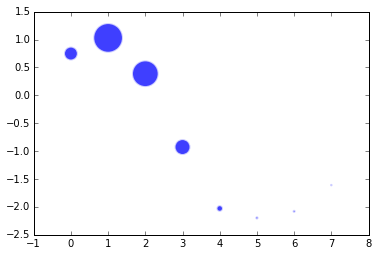

In [12]:
sct = scatter(np.arange(10), MOBodds, s=MOBct, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

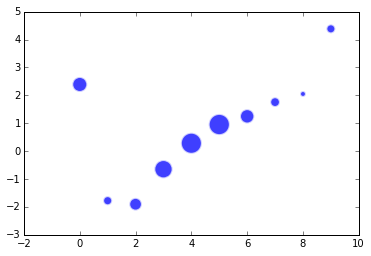

In [13]:
sct = scatter(np.arange(10), LTVodds, s=LTVct, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)

#### From the plot, we could decide to use MOB directly. For LTV, we are going to create dummies for 0 or missing LTV.

### Create LTV= 0 dummy variable

In [15]:
df['LTV0'] =  (df.mtm_hpi_ltv_imp==0)*1

### Seperate purchase loan vs other in purpose code

In [24]:
df['purpose'] = (df['PURPOSE_CD']==1)*1

### Process property type: SF - 1, Condo - 2, Others - 0

In [25]:
df['propertytype'] = df['PROPERTY_TYPE_CD'].isin([1,11,12,13,14,15,20]) * 1 + df['PROPERTY_TYPE_CD'].isin([2,3,4]) * 2

### Processs Mortgaget type: Fix - 1, ARM and IOs - 0

In [27]:
df.mortgage_type = df.mortgage_type.fillna('other')
df['mtgtype'] = (df.mortgage_type=='fix') * 1

## Model Fitting

### Model1: LTV0 and LTV

In [37]:
train_cols = ['LTV0','mtm_hpi_ltv_imp']
model = sm.Logit(df.lc,df[train_cols])
result = model.fit()
print result.summary()

pred = result.predict()
y = df.lc.values
print "AUROC is " + str(roc_auc_score(y, pred))

Optimization terminated successfully.
         Current function value: 0.588126
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     lc   No. Observations:                 2116
Model:                          Logit   Df Residuals:                     2114
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Sep 2015   Pseudo R-squ.:                  0.1224
Time:                        16:36:55   Log-Likelihood:                -1244.5
converged:                       True   LL-Null:                       -1418.0
                                        LLR p-value:                 1.770e-77
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
LTV0                5.2364      1.003      5.223      0.000         3.271     7.202
mtm_hpi_ltv_im

### Model 2 : Add MOB

In [38]:
train_cols = ['LTV0','mtm_hpi_ltv_imp', 'MOB']
model = sm.Logit(df.lc,df[train_cols])
result = model.fit()
print result.summary()

pred = result.predict()
y = df.lc.values
print "AUROC is " + str(roc_auc_score(y, pred))

Optimization terminated successfully.
         Current function value: 0.497732
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     lc   No. Observations:                 2116
Model:                          Logit   Df Residuals:                     2113
Method:                           MLE   Df Model:                            2
Date:                Thu, 03 Sep 2015   Pseudo R-squ.:                  0.2573
Time:                        16:37:59   Log-Likelihood:                -1053.2
converged:                       True   LL-Null:                       -1418.0
                                        LLR p-value:                3.534e-159
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
LTV0                6.9979      1.011      6.924      0.000         5.017     8.979
mtm_hpi_ltv_im

### Model 3 : Add Purpose and Property type

In [39]:
train_cols = ['LTV0','mtm_hpi_ltv_imp','MOB','propertytype','purpose']
model = sm.Logit(df.lc,df[train_cols])
result = model.fit()
print result.summary()

pred = result.predict()
y = df.lc.values
print "AUROC is " + str(roc_auc_score(y, pred))

Optimization terminated successfully.
         Current function value: 0.488477
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     lc   No. Observations:                 2116
Model:                          Logit   Df Residuals:                     2111
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Sep 2015   Pseudo R-squ.:                  0.2711
Time:                        16:41:13   Log-Likelihood:                -1033.6
converged:                       True   LL-Null:                       -1418.0
                                        LLR p-value:                4.256e-165
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
LTV0                7.0021      1.013      6.913      0.000         5.017     8.987
mtm_hpi_ltv_im

### Model 4 : Add Mortgage Type

In [40]:
train_cols = ['LTV0','mtm_hpi_ltv_imp','MOB','propertytype','purpose','mtgtype']
model = sm.Logit(df.lc,df[train_cols])
result = model.fit()
print result.summary()

pred = result.predict()
y = df.lc.values
print "AUROC is " + str(roc_auc_score(y, pred))

Optimization terminated successfully.
         Current function value: 0.487078
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     lc   No. Observations:                 2116
Model:                          Logit   Df Residuals:                     2110
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Sep 2015   Pseudo R-squ.:                  0.2732
Time:                        16:41:57   Log-Likelihood:                -1030.7
converged:                       True   LL-Null:                       -1418.0
                                        LLR p-value:                3.294e-165
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
LTV0                6.9742      1.013      6.885      0.000         4.989     8.960
mtm_hpi_ltv_im

### Model 5 : Add only property type

In [41]:
train_cols = ['LTV0','mtm_hpi_ltv_imp','MOB','propertytype']
model = sm.Logit(df.lc,df[train_cols])
result = model.fit()
print result.summary()

pred = result.predict()
y = df.lc.values
print "AUROC is " + str(roc_auc_score(y, pred))

Optimization terminated successfully.
         Current function value: 0.490943
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     lc   No. Observations:                 2116
Model:                          Logit   Df Residuals:                     2112
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Sep 2015   Pseudo R-squ.:                  0.2674
Time:                        16:46:54   Log-Likelihood:                -1038.8
converged:                       True   LL-Null:                       -1418.0
                                        LLR p-value:                4.483e-164
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
LTV0                7.1460      1.012      7.063      0.000         5.163     9.129
mtm_hpi_ltv_im

In [42]:
import os
os.getcwd()

'C:\\Users\\ub55123\\Desktop\\Kaggle\\MTG'